# ANALYSIS OF BENCHMARK

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# 1. Data

In [28]:
data = [
    # GNN
    {"Model": "GNN", "Gene feature": "CGP", "Cell feature": "CNV", "Test AP": 0.91169, "Gene mAP": 0.62032, "Cell mAP": 0.89173},
    {"Model": "GNN", "Gene feature": "CGP", "Cell feature": "MOSA", "Test AP": 0.92115, "Gene mAP": 0.67127, "Cell mAP": 0.90368},
    {"Model": "GNN", "Gene feature": "CGP", "Cell feature": "expression", "Test AP": 0.94341, "Gene mAP": 0.73382, "Cell mAP": 0.92719},
    {"Model": "GNN", "Gene feature": "CGP", "Cell feature": "expression_mg", "Test AP": 0.92526, "Gene mAP": 0.67046, "Cell mAP": 0.90529},

    # GNN-GNN-MPDEP
    {"Model": "GNN-GNN-MPDEP", "Gene feature": "CGP", "Cell feature": "CNV", "Test AP": 0.92433, "Gene mAP": 0.65681, "Cell mAP": 0.90562},
    {"Model": "GNN-GNN-MPDEP", "Gene feature": "CGP", "Cell feature": "MOSA", "Test AP": 0.92744, "Gene mAP": 0.67661, "Cell mAP": 0.90958},
    {"Model": "GNN-GNN-MPDEP", "Gene feature": "CGP", "Cell feature": "expression", "Test AP": 0.93293, "Gene mAP": 0.68931, "Cell mAP": 0.91407},
    {"Model": "GNN-GNN-MPDEP", "Gene feature": "CGP", "Cell feature": "expression_mg", "Test AP": 0.93779, "Gene mAP": 0.70265, "Cell mAP": 0.91990},

    # GNN-GNN-MPMUT
    {"Model": "GNN-GNN-MPMUT", "Gene feature": "CGP", "Cell feature": "CNV", "Test AP": 0.90575, "Gene mAP": 0.61233, "Cell mAP": 0.88988},
    {"Model": "GNN-GNN-MPMUT", "Gene feature": "CGP", "Cell feature": "MOSA", "Test AP": 0.92706, "Gene mAP": 0.68268, "Cell mAP": 0.90832},
    {"Model": "GNN-GNN-MPMUT", "Gene feature": "CGP", "Cell feature": "expression", "Test AP": 0.94571, "Gene mAP": 0.72593, "Cell mAP": 0.92994},
    {"Model": "GNN-GNN-MPMUT", "Gene feature": "CGP", "Cell feature": "expression_mg", "Test AP": 0.94733, "Gene mAP": 0.73328, "Cell mAP": 0.93113},

    # MLP-GNN
    {"Model": "MLP-GNN", "Gene feature": "CGP", "Cell feature": "CNV", "Test AP": 0.89657, "Gene mAP": 0.58493, "Cell mAP": 0.88069},
    {"Model": "MLP-GNN", "Gene feature": "CGP", "Cell feature": "MOSA", "Test AP": 0.92421, "Gene mAP": 0.67078, "Cell mAP": 0.90479},
    {"Model": "MLP-GNN", "Gene feature": "CGP", "Cell feature": "expression", "Test AP": 0.94184, "Gene mAP": 0.70907, "Cell mAP": 0.92460},
    {"Model": "MLP-GNN", "Gene feature": "CGP", "Cell feature": "expression_mg", "Test AP": 0.92904, "Gene mAP": 0.67378, "Cell mAP": 0.91053},

    # MLP
    {"Model": "MLP", "Gene feature": "CGP", "Cell feature": "CNV", "Test AP": 0.91141, "Gene mAP": 0.62358, "Cell mAP": 0.89461},
    {"Model": "MLP", "Gene feature": "CGP", "Cell feature": "MOSA", "Test AP": 0.93167, "Gene mAP": 0.70345, "Cell mAP": 0.91343},
    {"Model": "MLP", "Gene feature": "CGP", "Cell feature": "expression", "Test AP": 0.95032, "Gene mAP": 0.75681, "Cell mAP": 0.93568},
    {"Model": "MLP", "Gene feature": "CGP", "Cell feature": "expression_mg", "Test AP": 0.95199, "Gene mAP": 0.76008, "Cell mAP": 0.93789},
]

df = pd.DataFrame(data)

# 2. Plots

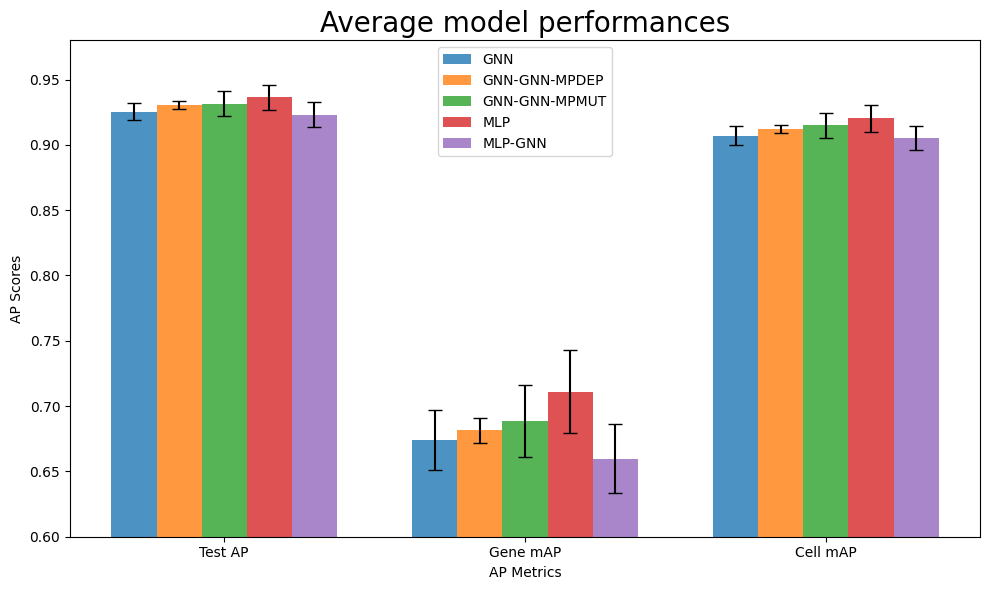

In [41]:
# Calculate mean and standard error for each model
mean_by_model = df.groupby("Model")[["Test AP", "Gene mAP", "Cell mAP"]].mean()
std_by_model = df.groupby("Model")[["Test AP", "Gene mAP", "Cell mAP"]].std()
count_by_model = df.groupby("Model")[["Test AP", "Gene mAP", "Cell mAP"]].count()

# Calculate standard error (std / sqrt(n))
stderr_by_model = std_by_model / np.sqrt(count_by_model)

# Transpose the dataframes to have AP metrics on x-axis and models as bars
mean_by_model_transposed = mean_by_model.T
stderr_by_model_transposed = stderr_by_model.T

# Create the bar plot with error bars
fig, ax = plt.subplots(figsize=(10, 6))

# Get the positions for the bars
x = np.arange(len(mean_by_model_transposed.index))
width = 0.15  # Width of bars
models = mean_by_model_transposed.columns

# Plot bars for each model with error bars
for i, model in enumerate(models):
    ax.bar(x + i * width, mean_by_model_transposed[model], width, 
           yerr=stderr_by_model_transposed[model], 
           label=model, capsize=5, alpha=0.8)

# Set the y-axis limits
ax.set_ylim(bottom=0.60, top=0.98)

# Set labels and title
ax.set_xlabel("AP Metrics")
ax.set_ylabel("AP Scores")
ax.set_title("Average model performances", fontsize=20)
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(mean_by_model_transposed.index)
ax.legend()

# Adjust plot to prevent labels from being cut off
plt.tight_layout()

# Save the figure BEFORE showing it

plt.savefig("./Data/Figures/All/Mean_metrics_per_model.png", dpi=600, bbox_inches='tight')
plt.show()

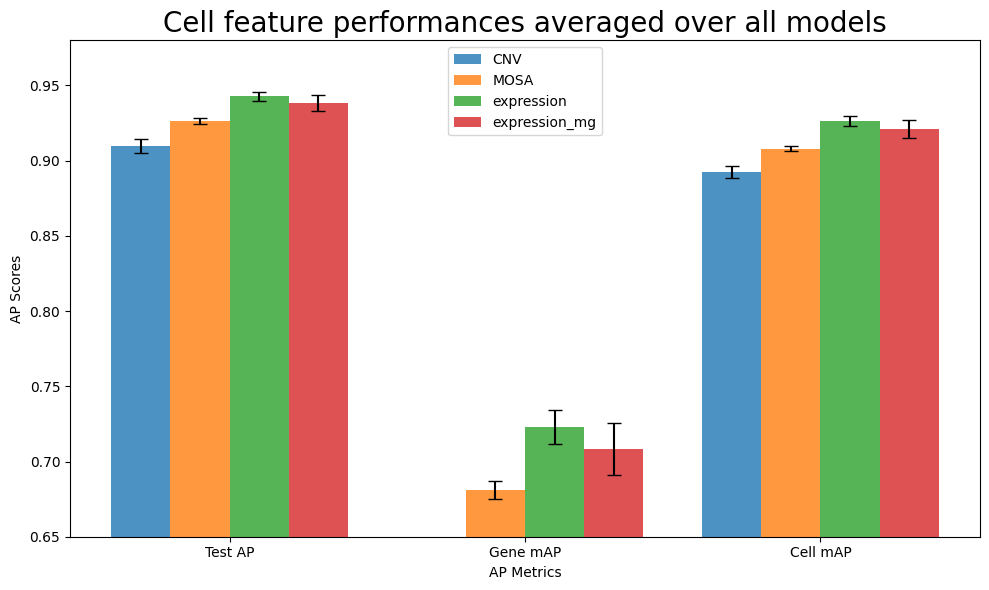

In [42]:
# Calculate mean and standard error for each cell feature
mean_by_model = df.groupby("Cell feature")[["Test AP", "Gene mAP", "Cell mAP"]].mean()
std_by_model = df.groupby("Cell feature")[["Test AP", "Gene mAP", "Cell mAP"]].std()
count_by_model = df.groupby("Cell feature")[["Test AP", "Gene mAP", "Cell mAP"]].count()

# Calculate standard error (std / sqrt(n))
stderr_by_model = std_by_model / np.sqrt(count_by_model)

# Transpose the dataframes to have AP metrics on x-axis and features as bars
mean_by_model_transposed = mean_by_model.T
stderr_by_model_transposed = stderr_by_model.T

# Create the bar plot with error bars
fig, ax = plt.subplots(figsize=(10, 6))

# Get the positions for the bars
x = np.arange(len(mean_by_model_transposed.index))
width = 0.2  # Width of bars
features = mean_by_model_transposed.columns

# Plot bars for each cell feature with error bars
for i, feature in enumerate(features):
    ax.bar(x + i * width, mean_by_model_transposed[feature], width, 
           yerr=stderr_by_model_transposed[feature], 
           label=feature, capsize=5, alpha=0.8)

# Set the y-axis limits
ax.set_ylim(bottom=0.65, top=0.98)

# Set labels and title
ax.set_xlabel("AP Metrics")
ax.set_ylabel("AP Scores")
ax.set_title("Cell feature performances averaged over all models", fontsize=20)
ax.set_xticks(x + width * (len(features) - 1) / 2)
ax.set_xticklabels(mean_by_model_transposed.index)
ax.legend()

# Adjust plot to prevent labels from being cut off
plt.tight_layout()

# Save the figure BEFORE showing it
plt.savefig("./Data/Figures/All/Cell_feature_metrics.png", dpi=600, bbox_inches='tight')
plt.show()

### AP scores by model 

#### scatter plots

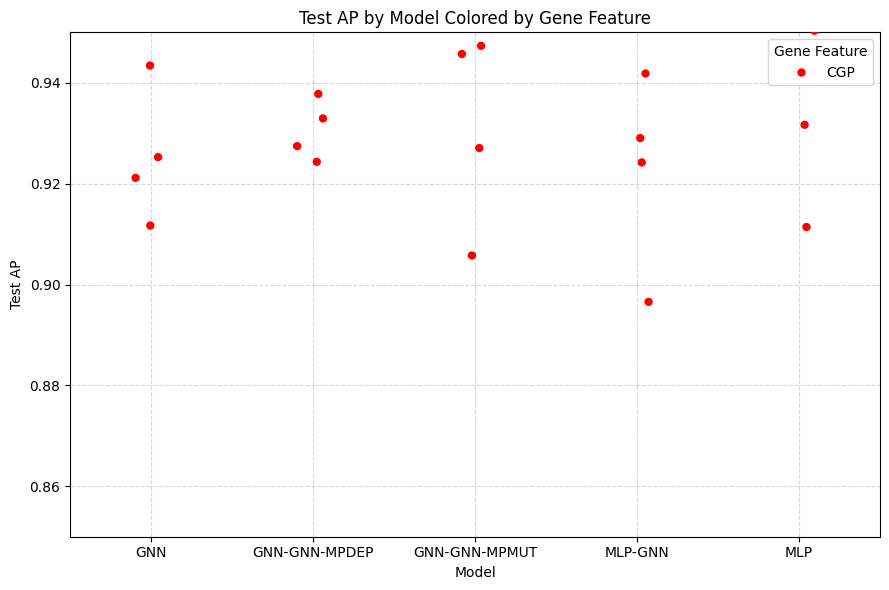

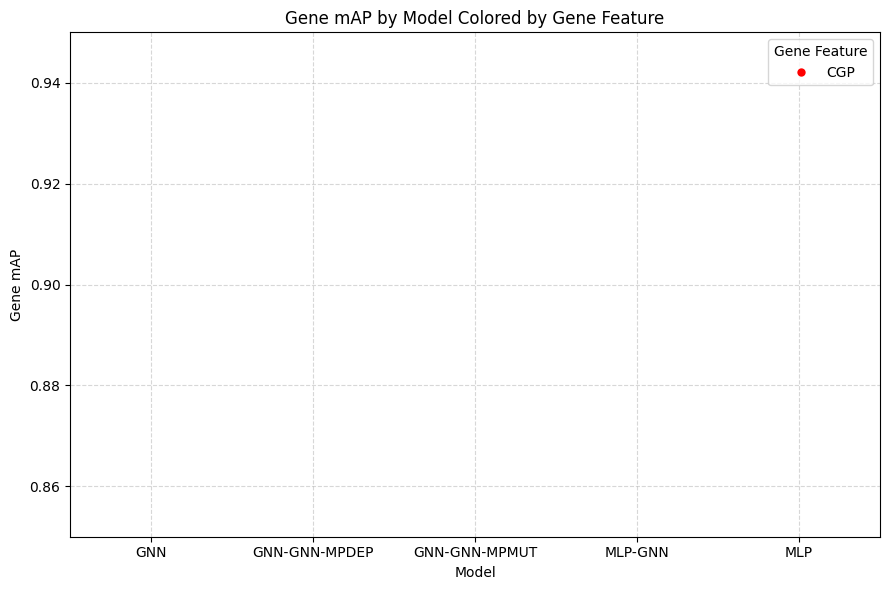

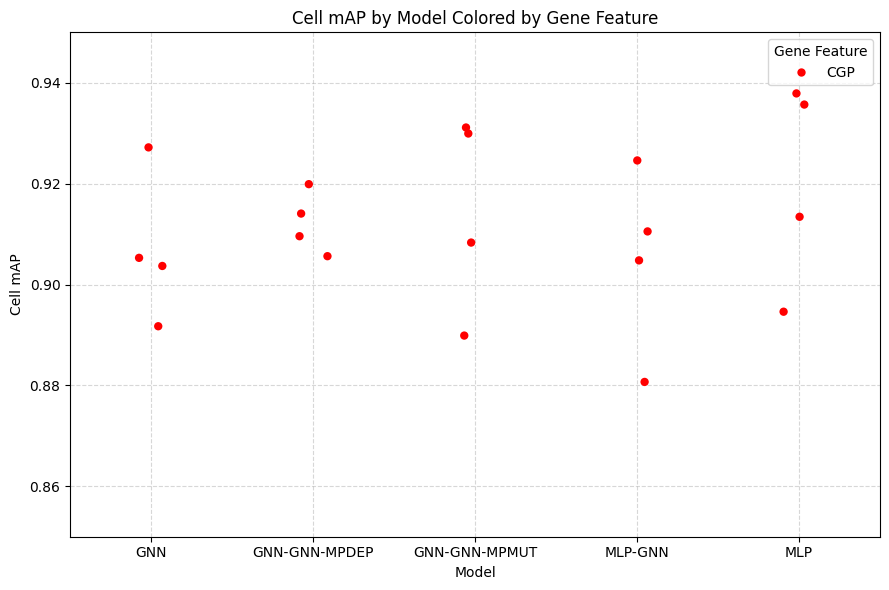

In [30]:

# Map gene features to colors
palette = {"CGP": "red", "C4": "black"}

# Plot
plt.figure(figsize=(9, 6))
sns.stripplot(data=df, x="Model", y="Test AP", hue="Gene feature", palette=palette, jitter=True, size=6)

plt.title("Test AP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()

# Plot
plt.figure(figsize=(9, 6))
sns.stripplot(data=df, x="Model", y="Gene mAP", hue="Gene feature", palette=palette, jitter=True, size=6)

plt.title("Gene mAP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()

# Plot
plt.figure(figsize=(9, 6))
sns.stripplot(data=df, x="Model", y="Cell mAP", hue="Gene feature", palette=palette, jitter=True, size=6)

plt.title("Cell mAP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()

#### boxplots

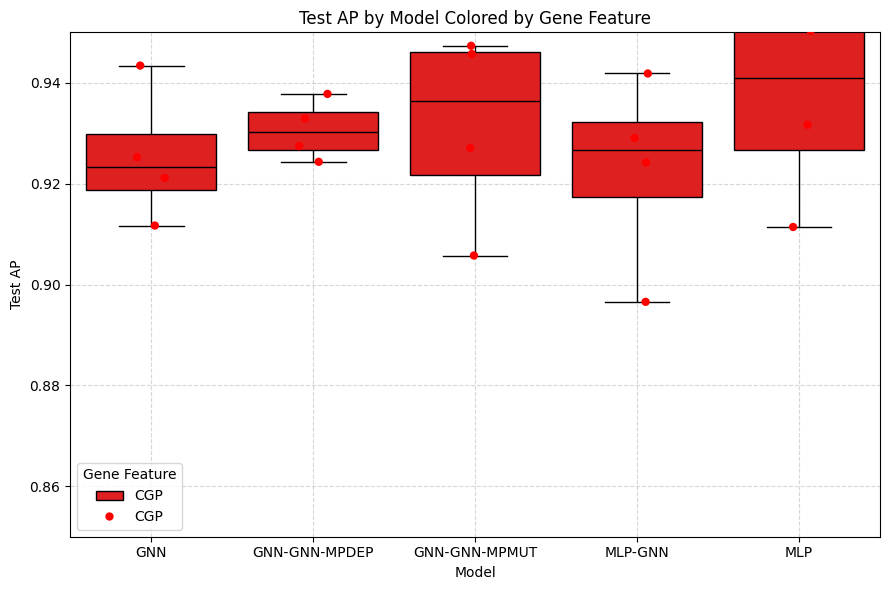

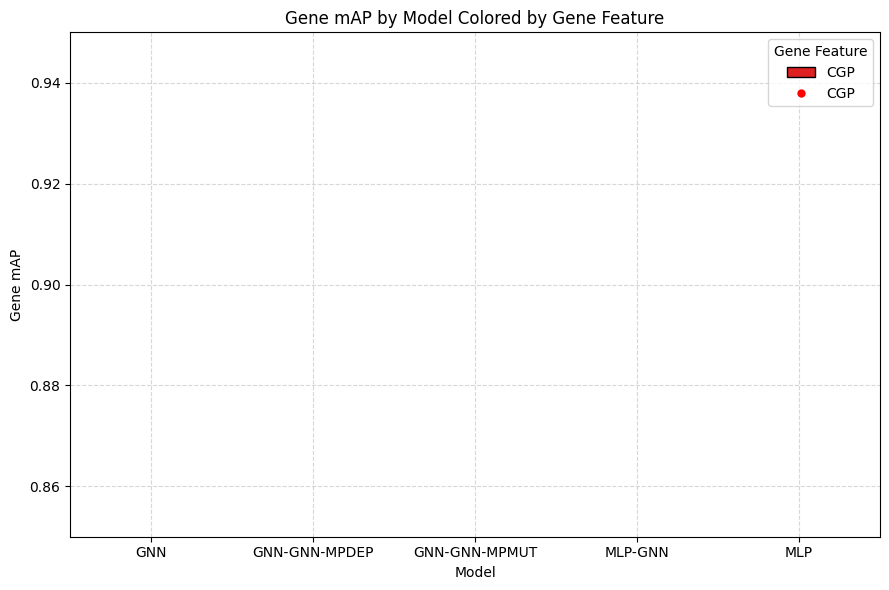

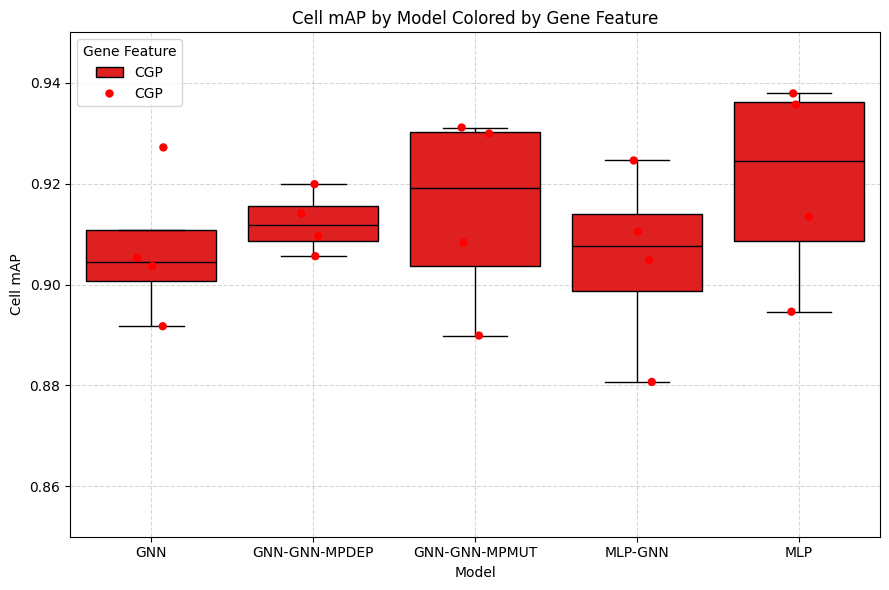

In [31]:

# Map gene features to colors
palette = {"CGP": "red", "C4": "black"}

# Plot
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x="Model", y="Test AP", hue="Gene feature", palette=palette, dodge=True, fliersize=0)
sns.stripplot(data=df, x="Model", y="Test AP", hue="Gene feature", palette=palette, jitter=True, size=6)

plt.title("Test AP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()

# Plot
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x="Model", y="Gene mAP", hue="Gene feature", palette=palette, dodge=True, fliersize=0)
sns.stripplot(data=df, x="Model", y="Gene mAP", hue="Gene feature", palette=palette, jitter=True, size=6)

plt.title("Gene mAP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()

# Plot
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x="Model", y="Cell mAP", hue="Gene feature", palette=palette, dodge=True, fliersize=0)
sns.stripplot(data=df, x="Model", y="Cell mAP", hue="Gene feature", palette=palette, jitter=True, size=6)

plt.title("Cell mAP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()

### AP scores by cell feature

#### colored by gene feature

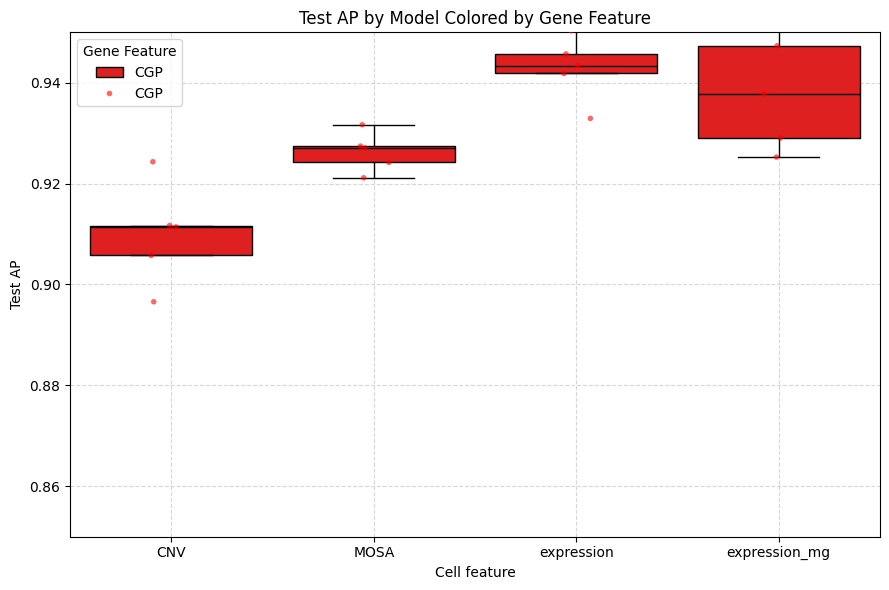

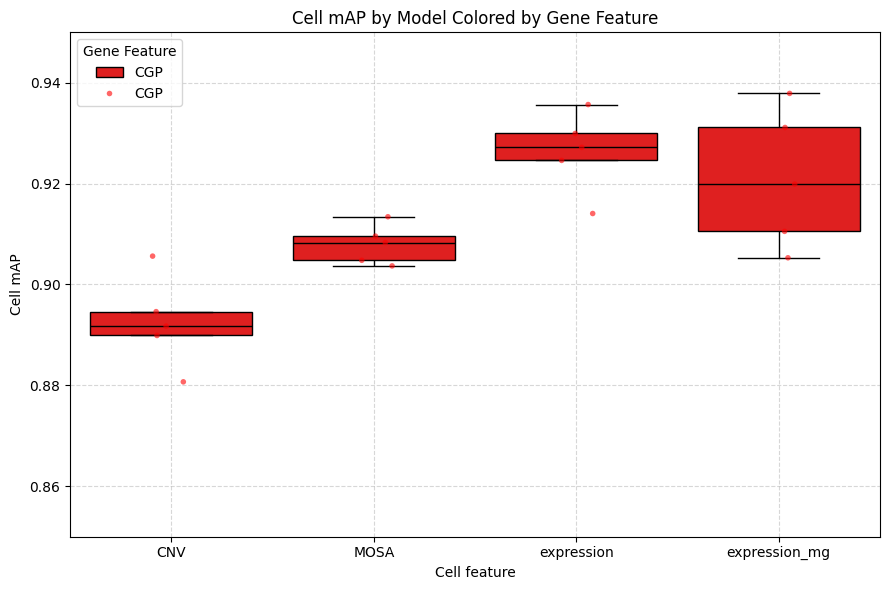

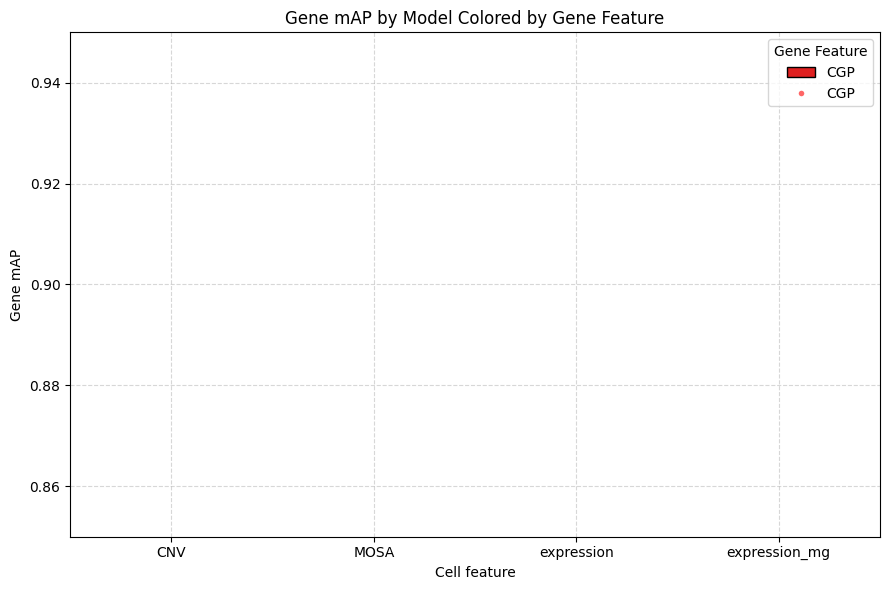

In [32]:
# Plot
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x="Cell feature", y="Test AP", hue="Gene feature", palette=palette, dodge=True, fliersize=0)
sns.stripplot(data=df, x="Cell feature", y="Test AP", hue="Gene feature", palette=palette, dodge=True, jitter=True, size=4, alpha=0.6)

plt.title("Test AP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()


# Plot
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x="Cell feature", y="Cell mAP", hue="Gene feature", palette=palette, dodge=True, fliersize=0)
sns.stripplot(data=df, x="Cell feature", y="Cell mAP", hue="Gene feature", palette=palette, dodge=True, jitter=True, size=4, alpha=0.6)

plt.title("Cell mAP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()


# Plot
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x="Cell feature", y="Gene mAP", hue="Gene feature", palette=palette, dodge=True, fliersize=0)
sns.stripplot(data=df, x="Cell feature", y="Gene mAP", hue="Gene feature", palette=palette, dodge=True, jitter=True, size=4, alpha=0.6)

plt.title("Gene mAP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()

#### colored by model

ValueError: The palette dictionary is missing keys: {'GNN-GNN-MPDEP', 'GNN-GNN-MPMUT'}

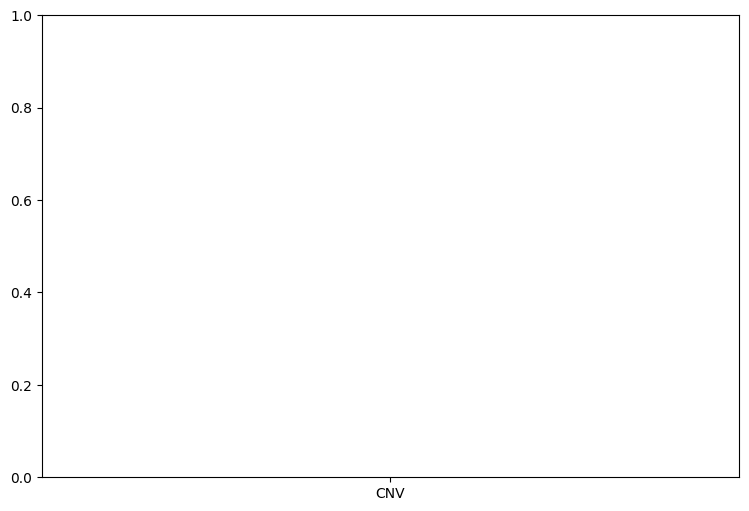

In [33]:
palette2 = {"GNN": "red", "GNN-GNN": "black", "MLP-GNN": "blue", "MLP": "green"}

# Plot
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x="Cell feature", y="Test AP", hue="Model", palette=palette2, dodge=True, fliersize=0)
sns.stripplot(data=df, x="Cell feature", y="Test AP", hue="Model", palette=palette2, dodge=True, jitter=True, size=4, alpha=0.6)

plt.title("Test AP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()

# Plot
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x="Cell feature", y="Cell mAP", hue="Model", palette=palette2, dodge=True, fliersize=0)
sns.stripplot(data=df, x="Cell feature", y="Cell mAP", hue="Model", palette=palette2, dodge=True, jitter=True, size=4, alpha=0.6)

plt.title("Cell mAP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()

# Plot
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x="Cell feature", y="Gene mAP", hue="Model", palette=palette2, dodge=True, fliersize=0)
sns.stripplot(data=df, x="Cell feature", y="Gene mAP", hue="Model", palette=palette2, dodge=True, jitter=True, size=4, alpha=0.6)

plt.title("Gene mAP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()

# 3. Statisctical tests

## For model

In [17]:
from scipy.stats import f_oneway

# Example: Test AP by model
groups = [df[df["Model"] == model]["Test AP"] for model in df["Model"].unique()]
f_stat, p_val = f_oneway(*groups)
print("ANOVA Test AP by Model: p =", p_val)


ANOVA Test AP by Model: p = 0.6390069311573682


Null hypothesis: all model's test AP are equal 
--> cannot be rejected because p = 0,14 > 0,05

In [18]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df["Test AP"], groups=df["Model"], alpha=0.05)
print(tukey)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
    GNN GNN-GNN     0.01 0.8443 -0.0262 0.0462  False
    GNN     MLP     0.01 0.8443 -0.0262 0.0462  False
    GNN MLP-GNN  -0.0025 0.9968 -0.0387 0.0337  False
GNN-GNN     MLP      0.0    1.0 -0.0362 0.0362  False
GNN-GNN MLP-GNN  -0.0125  0.739 -0.0487 0.0237  False
    MLP MLP-GNN  -0.0125  0.739 -0.0487 0.0237  False
-----------------------------------------------------


Conclusion: all models score equally well

## For gene feature

In [19]:
tukey = pairwise_tukeyhsd(endog=df["Test AP"], groups=df["Gene feature"], alpha=0.05)
print(tukey)

groups = [df[df["Gene feature"] == feature]["Test AP"] for feature in df["Gene feature"].unique()]
f_stat, p_val = f_oneway(*groups)
print("ANOVA Test AP by Gene Feature: p =", p_val)

df.groupby("Gene feature")["Test AP"].mean()


ValueError: 2 or more groups required for multiple comparisons

Conclusion: p<0.05. This means that the CGP scores significantly better than the C4 ?

In [13]:
tukey = pairwise_tukeyhsd(endog=df["Gene mAP"], groups=df["Gene feature"], alpha=0.05)
print(tukey)

groups = [df[df["Gene feature"] == feature]["Gene mAP"] for feature in df["Gene feature"].unique()]
f_stat, p_val = f_oneway(*groups)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    C4    CGP   0.0056 0.3133 -0.0056 0.0168  False
---------------------------------------------------


In [14]:
tukey = pairwise_tukeyhsd(endog=df["Cell mAP"], groups=df["Gene feature"], alpha=0.05)
print(tukey)

groups = [df[df["Gene feature"] == feature]["Cell mAP"] for feature in df["Gene feature"].unique()]
f_stat, p_val = f_oneway(*groups)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
    C4    CGP   0.0125 0.0039 0.0043 0.0207   True
--------------------------------------------------


In [15]:
df.groupby("Gene feature")["Cell mAP"].mean()


Gene feature
C4     0.881875
CGP    0.894375
Name: Test cell AP, dtype: float64

## For cell features

In [16]:
tukey = pairwise_tukeyhsd(endog=df["Gene mAP"], groups=df["Cell feature"], alpha=0.05)
print(tukey)

df.groupby("Cell feature")["Gene mAP"].mean()



     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1       group2    meandiff p-adj   lower  upper  reject
--------------------------------------------------------------
       CNV          MOSA   0.0275 0.0008  0.0104 0.0446   True
       CNV    expression   0.0162 0.0668 -0.0008 0.0333  False
       CNV expression_mg   0.0125 0.2131 -0.0046 0.0296  False
      MOSA    expression  -0.0112 0.2957 -0.0283 0.0058  False
      MOSA expression_mg   -0.015  0.101 -0.0321 0.0021  False
expression expression_mg  -0.0038 0.9315 -0.0208 0.0133  False
--------------------------------------------------------------


Cell feature
CNV              0.88500
MOSA             0.91250
expression       0.90125
expression_mg    0.89750
Name: Test gene AP, dtype: float64

In [17]:
tukey = pairwise_tukeyhsd(endog=df["Test AP"], groups=df["Cell feature"], alpha=0.05)
print(tukey)

df.groupby("Cell feature")["Test AP"].mean()


     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1       group2    meandiff p-adj   lower  upper  reject
--------------------------------------------------------------
       CNV          MOSA   0.0038 0.9451 -0.0148 0.0223  False
       CNV    expression    0.005 0.8816 -0.0135 0.0235  False
       CNV expression_mg     -0.0    1.0 -0.0185 0.0185  False
      MOSA    expression   0.0012 0.9977 -0.0173 0.0198  False
      MOSA expression_mg  -0.0038 0.9451 -0.0223 0.0148  False
expression expression_mg   -0.005 0.8816 -0.0235 0.0135  False
--------------------------------------------------------------


Cell feature
CNV              0.91125
MOSA             0.91500
expression       0.91625
expression_mg    0.91125
Name: Test AP, dtype: float64

In [18]:
tukey = pairwise_tukeyhsd(endog=df["Cell mAP"], groups=df["Cell feature"], alpha=0.05)
print(tukey)

df.groupby("Cell feature")["Cell mAP"].mean()


     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1       group2    meandiff p-adj   lower  upper  reject
--------------------------------------------------------------
       CNV          MOSA  -0.0038 0.9423 -0.0219 0.0144  False
       CNV    expression  -0.0038 0.9423 -0.0219 0.0144  False
       CNV expression_mg   -0.005 0.8758 -0.0232 0.0132  False
      MOSA    expression     -0.0    1.0 -0.0182 0.0182  False
      MOSA expression_mg  -0.0012 0.9976 -0.0194 0.0169  False
expression expression_mg  -0.0012 0.9976 -0.0194 0.0169  False
--------------------------------------------------------------


Cell feature
CNV              0.89125
MOSA             0.88750
expression       0.88750
expression_mg    0.88625
Name: Test cell AP, dtype: float64

/var/folders/ds/76n_grr91zn97zn1yl541y5c0000gn/T/ipykernel_39767/919013100.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(data=combined_df, x='model', y=metric,


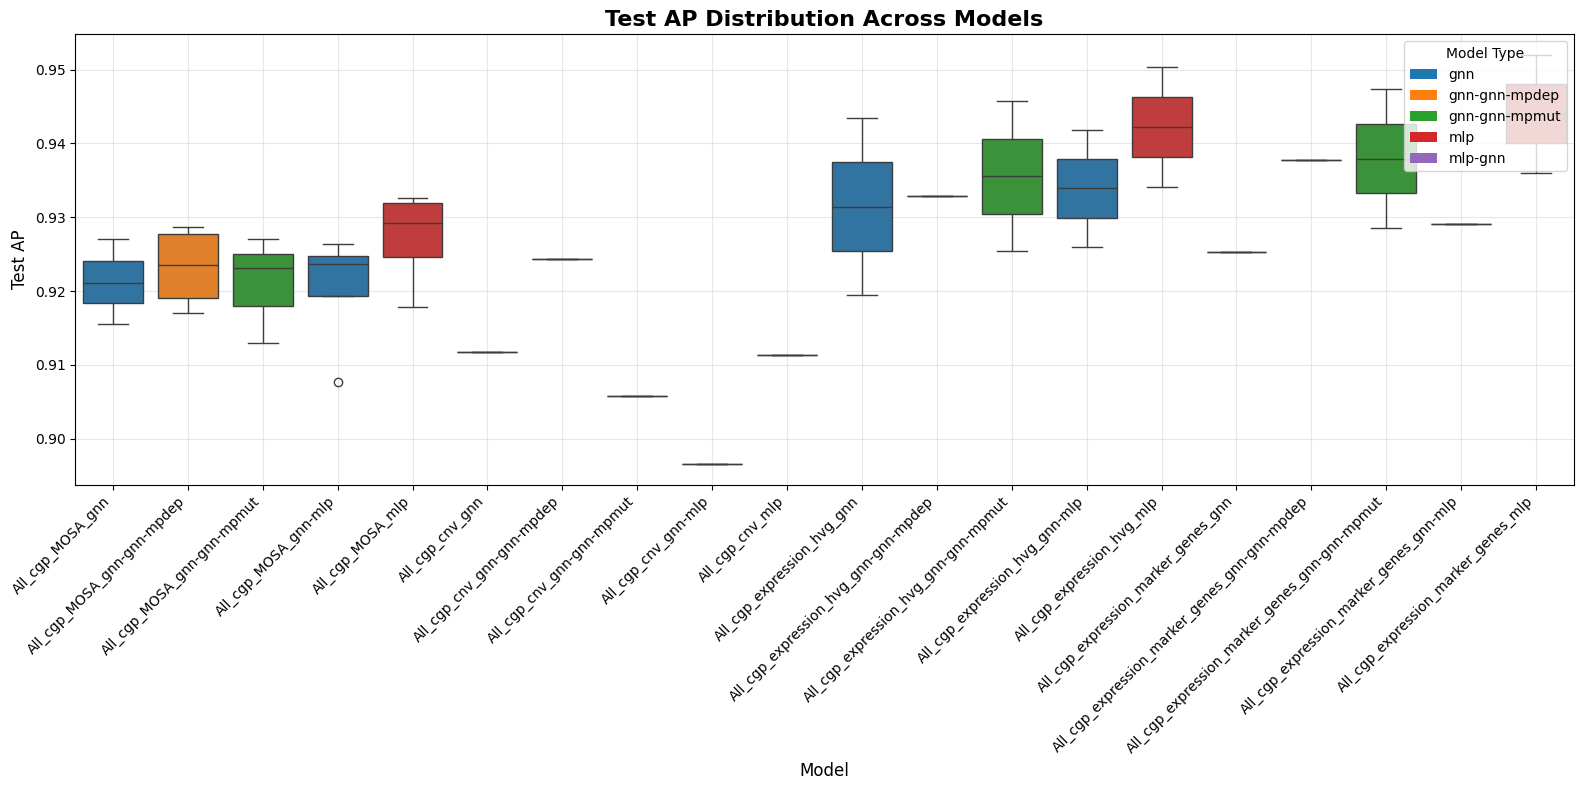

/var/folders/ds/76n_grr91zn97zn1yl541y5c0000gn/T/ipykernel_39767/919013100.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(data=combined_df, x='model', y=metric,


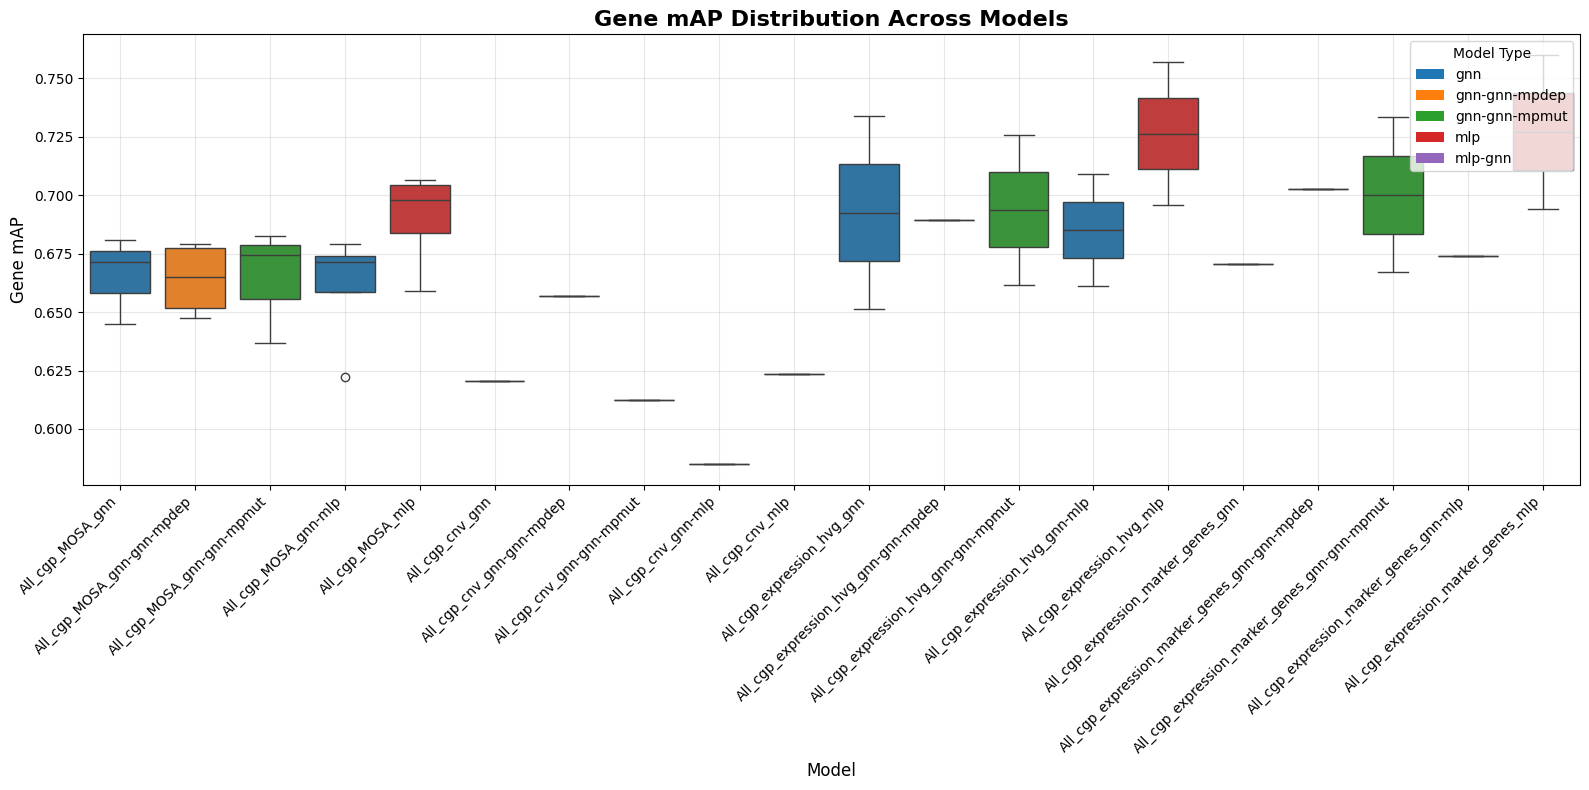

/var/folders/ds/76n_grr91zn97zn1yl541y5c0000gn/T/ipykernel_39767/919013100.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(data=combined_df, x='model', y=metric,


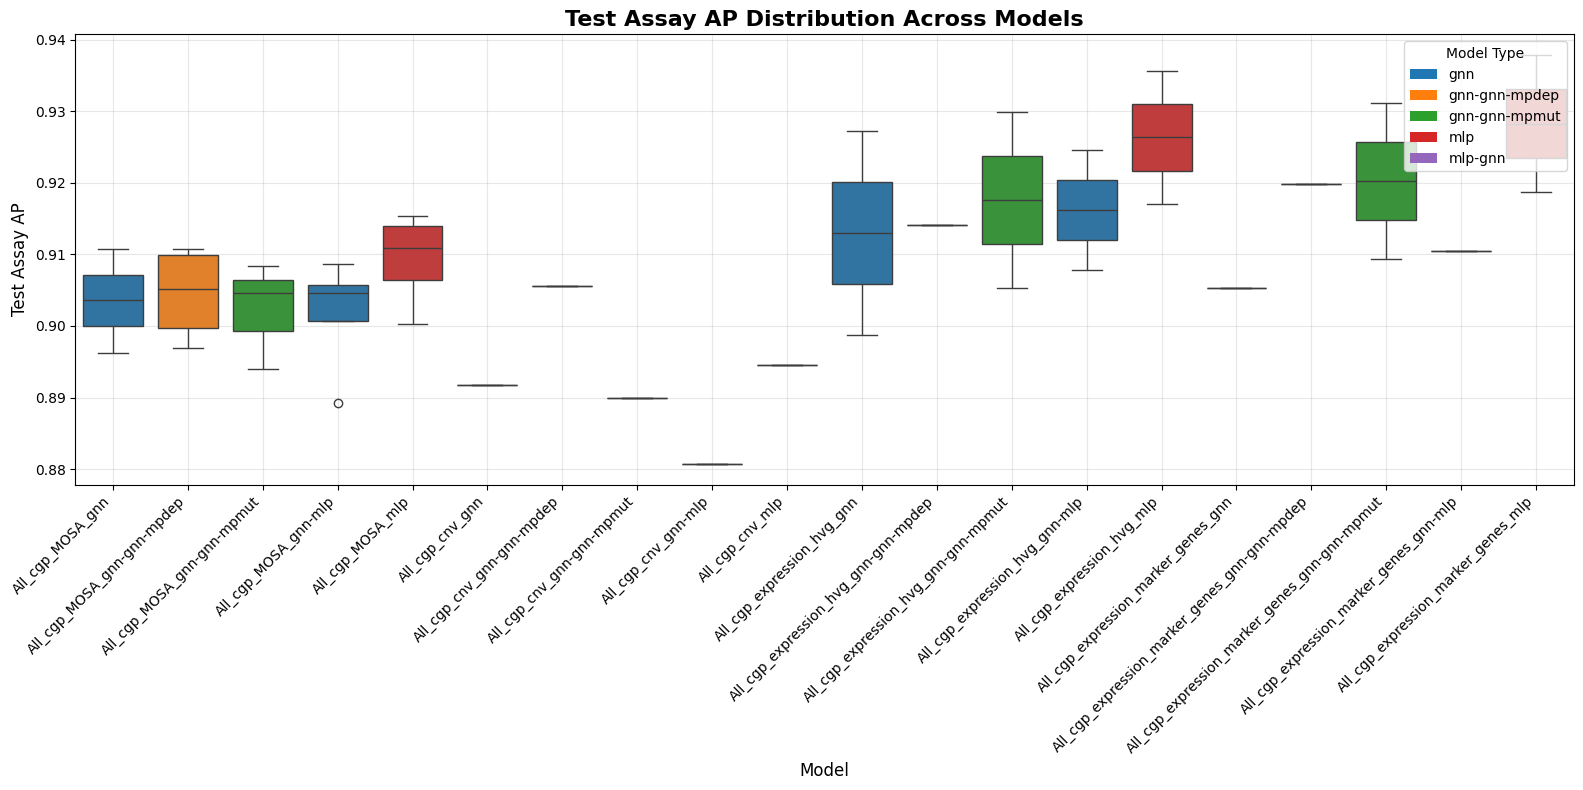

Summary Statistics by Model Type:

TEST_AP:
By Model Type:
               count    mean     std     min     max
model_type                                          
gnn               15  0.9226  0.0119  0.8966  0.9434
gnn-gnn-mpdep      7  0.9268  0.0072  0.9170  0.9378
gnn-gnn-mpmut      8  0.9270  0.0143  0.9057  0.9473
mlp                9  0.9325  0.0133  0.9114  0.9520

By Individual Model:
                                                               mean     std
model_type    model                                                        
gnn           All_cgp_MOSA_gnn                               0.9212  0.0057
              All_cgp_MOSA_gnn-mlp                           0.9204  0.0085
              All_cgp_cnv_gnn                                0.9117     NaN
              All_cgp_cnv_gnn-mlp                            0.8966     NaN
              All_cgp_expression_hvg_gnn                     0.9314  0.0169
              All_cgp_expression_hvg_gnn-mlp                 0.9339  

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from pathlib import Path

# Set style for better-looking plots
plt.style.use('default')

# Find all grid_results.csv files
pattern = "./Results/All_cancers_results/*/grid_search/grid_results.csv"
csv_files = glob.glob(pattern)

# Function to extract model type from folder name
def extract_model_type(folder_name):
    folder_lower = folder_name.lower()
    if 'gnn-gnn-mpdep' in folder_lower:
        return 'gnn-gnn-mpdep'
    elif 'gnn-gnn-mpmut' in folder_lower:
        return 'gnn-gnn-mpmut'
    elif 'mlp-gnn' in folder_lower:
        return 'mlp-gnn'
    elif 'gnn' in folder_lower:
        return 'gnn'
    elif 'mlp' in folder_lower:
        return 'mlp'
    else:
        return 'unknown'

# Read and combine all CSV files
all_data = []
for file_path in csv_files:
    # Extract model name from path
    model_name = file_path.split('/')[-3]  # Gets the directory name before /grid_search/
    model_type = extract_model_type(model_name)
    
    # Read CSV
    df = pd.read_csv(file_path)
    df['model'] = model_name
    df['model_type'] = model_type
    all_data.append(df)

# Combine all dataframes
combined_df = pd.concat(all_data, ignore_index=True)

# Define colors for each model type
model_colors = {
    'gnn': 'tab:blue',                # blue
    'gnn-gnn-mpdep': 'tab:orange',    # orange
    'gnn-gnn-mpmut': 'tab:green',     # green
    'mlp': 'tab:red',                 # red
    'mlp-gnn': 'tab:purple'           # purple
}

# Define the metrics to plot
metrics = ['test_AP', 'test_gene_AP', 'test_assay_AP']
metric_names = ['Test AP', 'Gene mAP', 'Test Assay AP']

# Create boxplots for each metric
for i, (metric, metric_name) in enumerate(zip(metrics, metric_names)):
    plt.figure(figsize=(16, 8))
    
    # Create color palette based on model type for each model
    model_order = sorted(combined_df['model'].unique())
    colors = [model_colors[combined_df[combined_df['model'] == model]['model_type'].iloc[0]] 
              for model in model_order]
    
    # Create boxplot with custom colors
    box_plot = sns.boxplot(data=combined_df, x='model', y=metric, 
                          order=model_order, palette=colors)
    
    # Customize the plot
    plt.title(f'{metric_name} Distribution Across Models', fontsize=16, fontweight='bold')
    plt.xlabel('Model', fontsize=12)
    plt.ylabel(metric_name, fontsize=12)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Add grid for better readability
    plt.grid(True, alpha=0.3)
    
    # Create legend for model types
    legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color, label=model_type) 
                      for model_type, color in model_colors.items()]
    plt.legend(handles=legend_elements, title='Model Type', loc='upper right')
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Optional: Print summary statistics by model type
print("Summary Statistics by Model Type:")
print("="*50)
for metric in metrics:
    print(f"\n{metric.upper()}:")
    print("By Model Type:")
    summary_by_type = combined_df.groupby('model_type')[metric].agg(['count', 'mean', 'std', 'min', 'max'])
    print(summary_by_type.round(4))
    print("\nBy Individual Model:")
    summary_by_model = combined_df.groupby(['model_type', 'model'])[metric].agg(['mean', 'std']).round(4)
    print(summary_by_model)

In [ ]:
path = "./Results/All_cancers_results/*/grid_search/grid_results.csv"
